Job 0 ------------------------------------------------------------------

In [1]:
def factorial(n):
    return 1 if n <= 1 else factorial(n-1)*n

In [2]:
num = int(input('Entrez un entier : '))
print(f'{num}! =', factorial(num))

Entrez un entier : 5
5! = 120


Job 0.1 ------------------------------------------------------------------

In [3]:
def power(x,n):
    return 1 if n == 0 else x * power(x, n-1)

In [4]:
num = int(input('Entrez un entier : '))

x = 2

print(f'{x}^{num} =', power(2,num))

Entrez un entier : 4
2^4 = 16


Job 03 ------------------------------------------------------------------

Job 08 ------------------------------------------------------------------

In [21]:
# load maze
with open('maze.mz', 'r') as maze_io :
    maze = []
    for row in maze_io :
        maze.append(list(row.strip()))

w = len(maze[0])
h = len(maze)

In [8]:
# create a list of links
directions = ((0,1),(0,-1),(1,0),(-1,0))
links = []
for i in range(h):
    for j in range(w):
        if maze[i][j] == '.' :
            for direction in directions :
                di,dj = direction
                if i+di in range(h) and j+dj in range(w) and maze[i+di][j+dj] == '.' and {(i,j),(i+di,j+dj)} not in links :
                    links.append( {(i,j),(i+di,j+dj)} )

In [9]:
# find a shortest path
borders = []
border = {(0,0)}
visited = set()
while (h-1,w-1) not in border :
    borders.append(border)
    visited |= border
    border = set()
    for node in borders[-1] :
        for link in links :
            if node in link :
                next_node = link - {node}
                if not (next_node & visited) :
                    border |= next_node

In [10]:
# reconstruct the path from succesive borders
current = h-1, w-1
path = [current]
for border in borders[::-1] :
    for node in border :
        if {node, current} in links :
            path.append(node)
            current = node
            break
path = path[::-1]

solved_maze = [row[:] for row in maze]
for i,j in path :
    solved_maze[i][j] = 'X'

for row in solved_maze :
    print(''.join(row))

XX.####################################################################################################################################################
.X....#........#.....#..............#...........#.....#...........#........#.....#...........#..#...........#........#........#.....#........#..#..#..#
#X.#..#######..#..#..#..#######..#..#..#..#..####..#..#..####..#######..#######..#######..####..#######..####..####..#..####..#..#######..#..#..#..#..#
#X.#...........#..#..#.....#.....#.....#..#..#.....#..#.....#.....#........#.....#..#.......................#..#........#........#..#.....#..#........#
#X.#############..####..#..#..####..#..#..####..#..####..####..#..#######..#..####..#..####..#######..####..#######..####..#..#..#..#..#######..#..#..#
#X.......#..............#..#.....#..#..#........#..#..#.....#..#.....#..#..#.....#........#.....#..#..#.....#...........#..#..#.....#..#.....#..#..#..#
#XX################..######################..#######..####..####..#..#..#..####..#..####

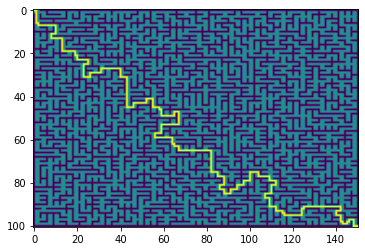

In [11]:
import matplotlib.pyplot as plt
conversion = {'.':1, '#':0, 'X':2}
num_solved_maze = [[conversion[solved_maze[i][j]] for j in range(w)] for i in range(h)]
plt.imshow(num_solved_maze);

Job 15 ------------------------------------------------------------------

In [26]:
def compare(s1, s2):
    if not s2 and not s1 :
        res = True
    elif s1 and not s2 or (s2 and not s1) :
        res = False
    elif s2[0] != '*' :
        if s1[0] != s2[0] :
            res = False
        else :
            res = compare(s1[1:], s2[1:])
    else :
        i = 0
        while i < len(s2) and s2[i] == '*' :
            i += 1
        if i == len(s2) :
            res = True
        else :
            if s2[i] in s1 :
                res = compare(s1[s1.index(s2[i])+1:], s2[i+1:])
            else : res = False
    return res

In [27]:
def Job_15(s1=None, s2=None):
    if not s1 : s1 = input('Saisir une chaîne de caractères : ')
    if not s2 : s2 = input('Saisir une chaîne de caractères avec "*" : ')
    print(compare(s1,s2))

In [28]:
Job_15('laplateforme_', 'l*_')

True


In [29]:
Job_15('Laplateforme_', 'L*e*e_')

True


In [30]:
Job_15('Laplateforme_', 'L*e*a*')

False


In [31]:
Job_15('', 'L*e*a*')

Saisir une chaîne de caractères : 
False


In [32]:
Job_15('Laplateforme_', '')

Saisir une chaîne de caractères avec "*" : 
False


In [34]:
Job_15()

Saisir une chaîne de caractères : zefetyeh
Saisir une chaîne de caractères avec "*" : gr*ergzrg
False
